In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#ignore warning messages 
import warnings
warnings.filterwarnings('ignore') 

sns.set()

In [2]:
train = pd.read_csv('../input/training.csv').set_index('RefId')
test = pd.read_csv('../input/test.csv').set_index('RefId')

train['kind'] = 'train'
test['kind'] = 'test'

dataset = train.copy()
dataset.head()

,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,...,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost,kind
RefId,,,,,,,,,,,,,,,,,,,,,
1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,RED,...,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113,train
2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,WHITE,...,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053,train
3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,MAROON,...,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389,train
4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,SILVER,...,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630,train
5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,SILVER,...,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020,train


In [3]:
print("dataCount:",len(dataset))
print('Nan in data:\n',dataset.isnull().sum())

dataCount: 72983
Nan in data:
 IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentAuctionCleanP

In [4]:
print(train.groupby("IsBadBuy").size())

IsBadBuy
0    64007
1     8976
dtype: int64


In [5]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
IsBadBuy,1,-0.158886,0.167164,-0.0446196,0.0825604,-0.109252,-0.102954,-0.0874184,-0.0836651,-0.109112,-0.10402,-0.103914,-0.100245,-0.0614884,0.00579642,-0.0999115,-0.0036975,0.0523193
VehYear,-0.158886,1,-0.957957,0.25966,-0.283719,0.581146,0.532927,0.581191,0.53923,0.59082,0.548426,0.59849,0.558669,0.280791,0.0682756,0.349965,0.0573802,-0.268696
VehicleAge,0.167164,-0.957957,1,-0.250801,0.319794,-0.56569,-0.51881,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.0748569,-0.312329,-0.0247714,0.25931
WheelTypeID,-0.0446196,0.25966,-0.250801,1,-0.213558,-0.0954708,-0.129597,-0.0727003,-0.102019,-0.088597,-0.121211,-0.0744198,-0.102488,0.187199,0.00790108,-0.162826,-0.00674691,-0.132798
VehOdo,0.0825604,-0.283719,0.319794,-0.213558,1,-0.0170218,0.0246171,0.0313058,0.0631649,-0.0285678,0.0121071,0.0158112,0.0480048,-0.288456,-0.0530415,-0.0620085,0.0295558,0.411718
MMRAcquisitionAuctionAveragePrice,-0.109252,0.581146,-0.56569,-0.0954708,-0.0170218,1,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.0456944,0.78984,0.038818,-0.0504169
MMRAcquisitionAuctionCleanPrice,-0.102954,0.532927,-0.51881,-0.129597,0.0246171,0.990347,1,0.902718,0.918242,0.92361,0.932114,0.860716,0.871203,0.0625025,0.0406752,0.781516,0.0386673,-0.0206443
MMRAcquisitionRetailAveragePrice,-0.0874184,0.581191,-0.460854,-0.0727003,0.0313058,0.910391,0.902718,1,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.0354886,0.746126,0.0806275,-0.053444
MMRAcquisitonRetailCleanPrice,-0.0836651,0.53923,-0.426382,-0.102019,0.0631649,0.910187,0.918242,0.990201,1,0.846914,0.855689,0.903188,0.90681,0.0696759,0.0312839,0.744966,0.0776697,-0.0269328
MMRCurrentAuctionAveragePrice,-0.109112,0.59082,-0.575607,-0.088597,-0.0285678,0.937817,0.92361,0.851647,0.846914,1,0.990329,0.915073,0.912231,0.111363,0.0489654,0.778738,0.0398758,-0.056798


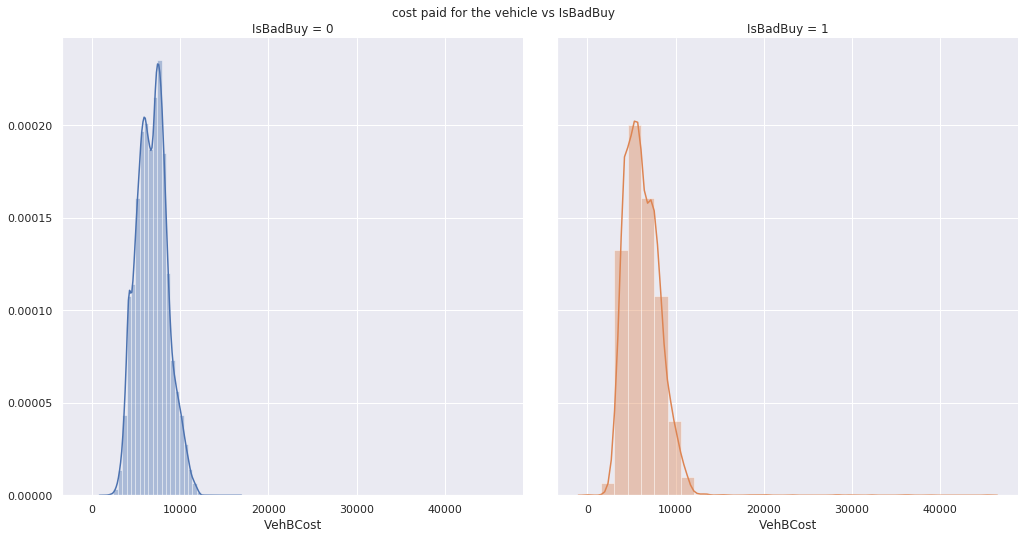

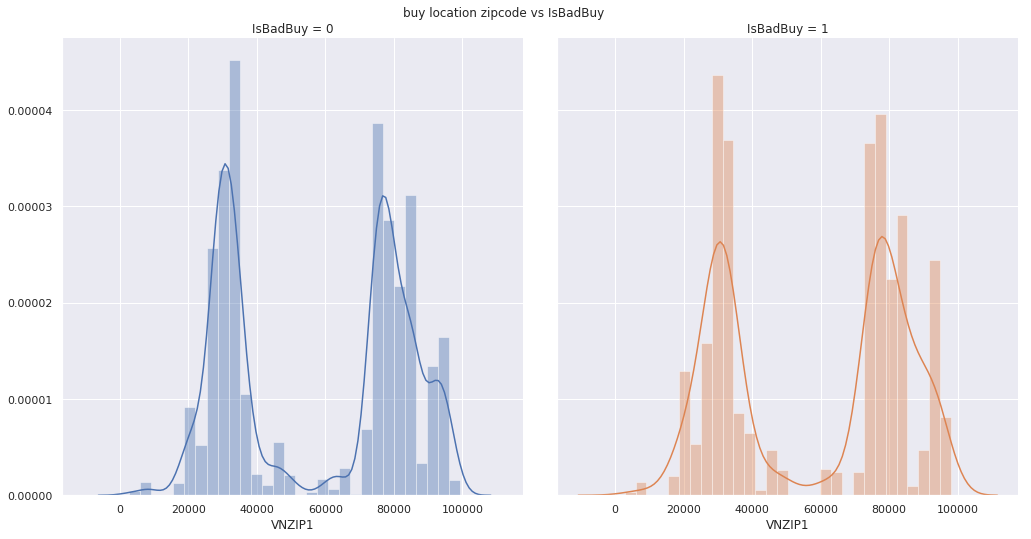

In [6]:
grid = sns.FacetGrid(dataset, col="IsBadBuy",hue = 'IsBadBuy' ,height=5)
grid.map(sns.distplot,'VehBCost',bins = 30);
grid.fig.suptitle('cost paid for the vehicle vs IsBadBuy')
grid.fig.set_size_inches(15,8)
plt.show()

grid = sns.FacetGrid(dataset, col="IsBadBuy",hue = 'IsBadBuy',height=5)
grid.map(sns.distplot,'VNZIP1',bins = 30);
grid.fig.suptitle('buy location zipcode vs IsBadBuy')
grid.fig.set_size_inches(15,8)
plt.show()

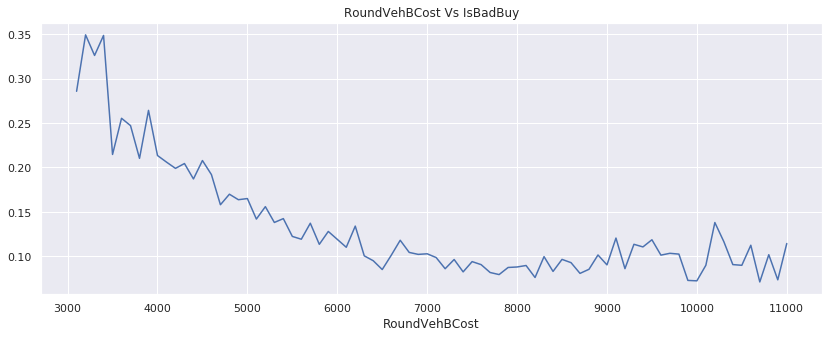

In [7]:
dataset['RoundVehBCost'] = round(dataset['VehBCost'],-2)
dataset.groupby('RoundVehBCost').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot(figsize=(14,5), title = "RoundVehBCost Vs IsBadBuy")
plt.show()

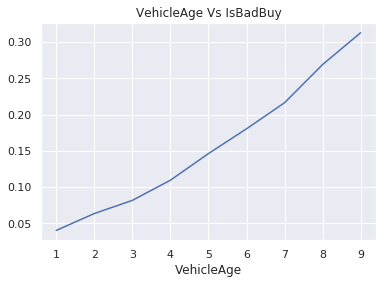

In [8]:
dataset.groupby('VehicleAge').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot(title = "VehicleAge Vs IsBadBuy")
plt.show()

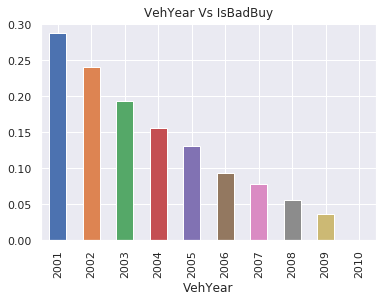

In [9]:
dataset.groupby("VehYear").mean()["IsBadBuy"].plot.bar(title = "VehYear Vs IsBadBuy")
plt.show()

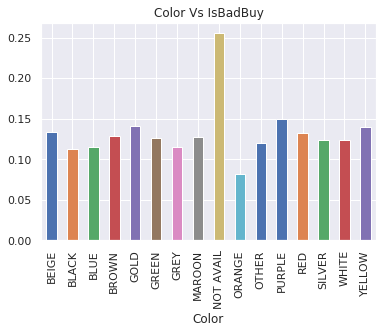

In [10]:
dataset.groupby('Color').mean()['IsBadBuy'].plot.bar(title = "Color Vs IsBadBuy")
plt.show()

dataset['Color'].dropna(inplace = True)
train['Color'].dropna(inplace = True)

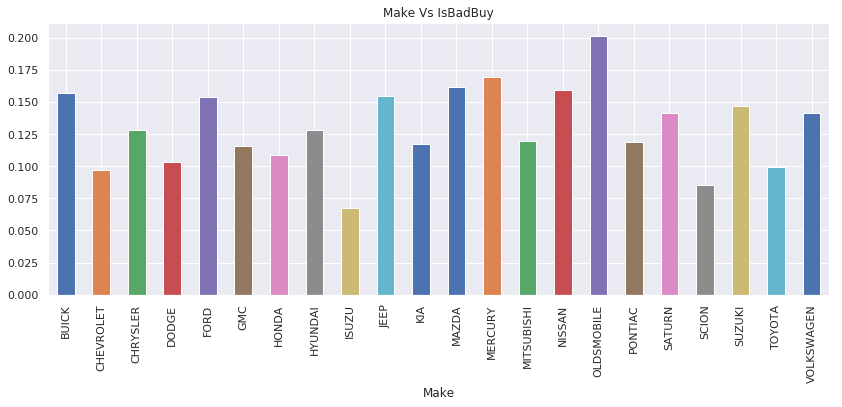

In [11]:

dataset.groupby('Make').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot.bar(figsize=(14,5), title = "Make Vs IsBadBuy")
plt.show()

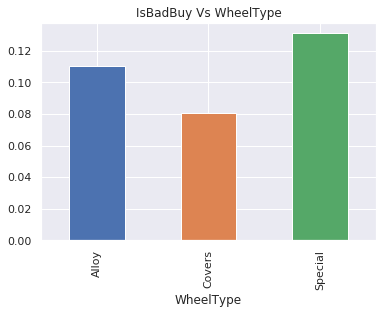

In [12]:
dataset.groupby('WheelType').mean()['IsBadBuy'].plot.bar(title = "IsBadBuy Vs WheelType")
plt.show()

In [13]:
wheel_groupby_multi_index = dataset.groupby(['WheelTypeID','WheelType']).sum().index
print(pd.DataFrame(wheel_groupby_multi_index.get_level_values(1), index = wheel_groupby_multi_index.get_level_values(0)))

print("\nWheelTypeID and WheelType is the same param")

#WheelTypeID and WheelType is the same param
#drop WheelTypeID and use only   WheelType
dataset.drop('WheelTypeID',axis = 1,inplace = True)

            WheelType
WheelTypeID          
1.0             Alloy
2.0            Covers
3.0           Special

WheelTypeID and WheelType is the same param


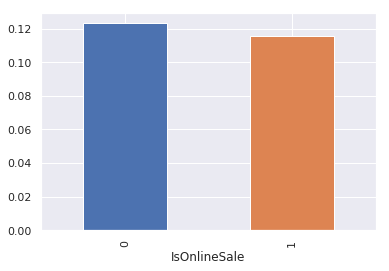

In [14]:
dataset.groupby("IsOnlineSale").mean()['IsBadBuy'].plot.bar()
plt.show()

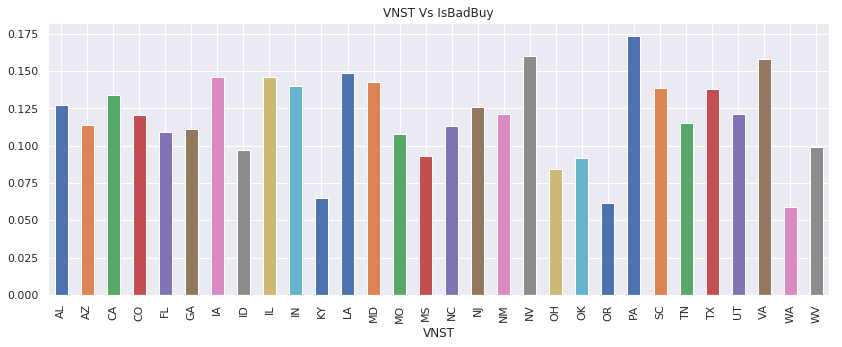

In [15]:
dataset.groupby('VNST').agg([np.mean,np.size])['IsBadBuy'].query('size > 100')['mean'].plot.bar(figsize=(14,5), title = "VNST Vs IsBadBuy")
plt.show()

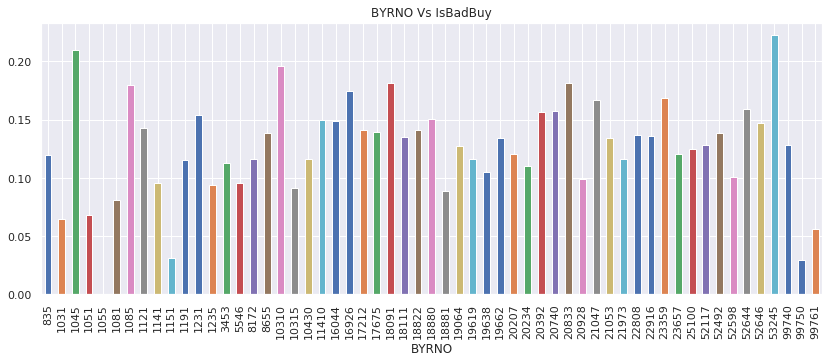

In [16]:
dataset.groupby('BYRNO').agg([np.mean,np.size])['IsBadBuy'].query('size > 10')['mean'].plot.bar(figsize=(14,5), title = "BYRNO Vs IsBadBuy")
plt.show()

Text(0.5, 1.0, 'PurchDate')

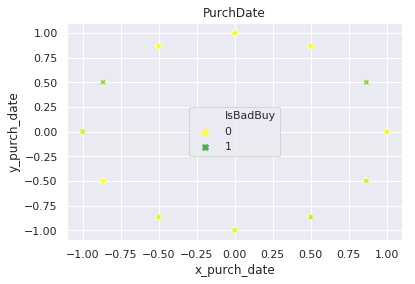

In [17]:
# dataset['launched_hour'] = pd.DatetimeIndex(dataset['PurchDate']).hour
# dataset['dayfloat']=pd.DatetimeIndex(dataset['PurchDate']).day+dataset.launched_hour/24.0
dataset['monthfloat']=pd.DatetimeIndex(dataset['PurchDate']).month # +dataset.dayfloat

dataset['x_purch_date']=np.sin(2.*np.pi*dataset.monthfloat/12.)
dataset['y_purch_date']=np.cos(2.*np.pi*dataset.monthfloat/12.)

ax = sns.scatterplot(x="x_purch_date", y="y_purch_date", hue="IsBadBuy",style="IsBadBuy",alpha = 0.4,palette = 'Set1_r', data=dataset)
ax.set_title("PurchDate")

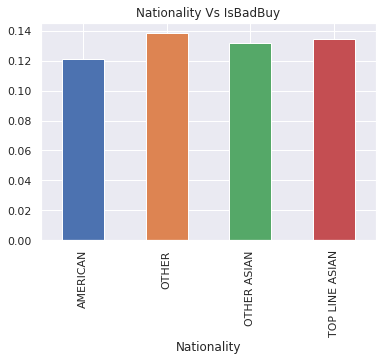

In [18]:
dataset.groupby('Nationality').agg([np.mean,np.size])['IsBadBuy'].query('size > 10')['mean'].plot.bar( title = "Nationality Vs IsBadBuy")
plt.show()